<a href="https://colab.research.google.com/github/marcelodepaoli/11_Regressao_Linear/blob/main/01_Regress%C3%A3o_Linear_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear com Python

Seu vizinho é um corretor de imóveis e quer ajuda para prever os preços dos imóveis para regiões dos EUA. Seria ótimo se você pudesse criar um modelo que dadas algumas características de uma casa ele retornasse uma estimativa de por quanto a casa deve vendida.

Ele perguntou se você poderia ajudá-lo com suas novas habilidades de ciência de dados. Você diz que sim e decide que a Regressão Linear pode ser um bom caminho para resolver esse problema!

Seu vizinho então lhe dá algumas informações sobre um monte de casas em regiões dos Estados Unidos, está tudo no conjunto de dados: USA_Housing.csv.

Os dados contêm as seguintes colunas:

* 'Avg. Area Income': média da renda dos moradores da cidade onde a casa está localizada
* 'Avg. Area House Age': idade média das casas na mesma cidade
* 'Avg. Area Number of Rooms': Número médio de cômodos das casas na mesma cidade
* 'Avg. Area Number of Bedrooms': Número médio de quartos das casas na mesma cidade
* 'Area Population': população da cidade em que a casa está localizada
* 'Price': preço a que a casa foi vendida
* 'Address': Endereço da casa

**Vamos começar!**
##Confira os dados

Conseguimos obter alguns dados do seu vizinho para preços de moradias como um conjunto csv, vamos preparar nosso ambiente com as bibliotecas que precisamos e depois importar os dados!

### Importe as Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Confira os Dados

In [2]:
dataframe = pd.read_csv("USA_Housing.csv")
dataframe

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [3]:
dataframe.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [4]:
dataframe.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

#Exploratory Data Analysis (EDA)

Vamos criar alguns gráficos simples para conferir os dados!

StopIteration: 

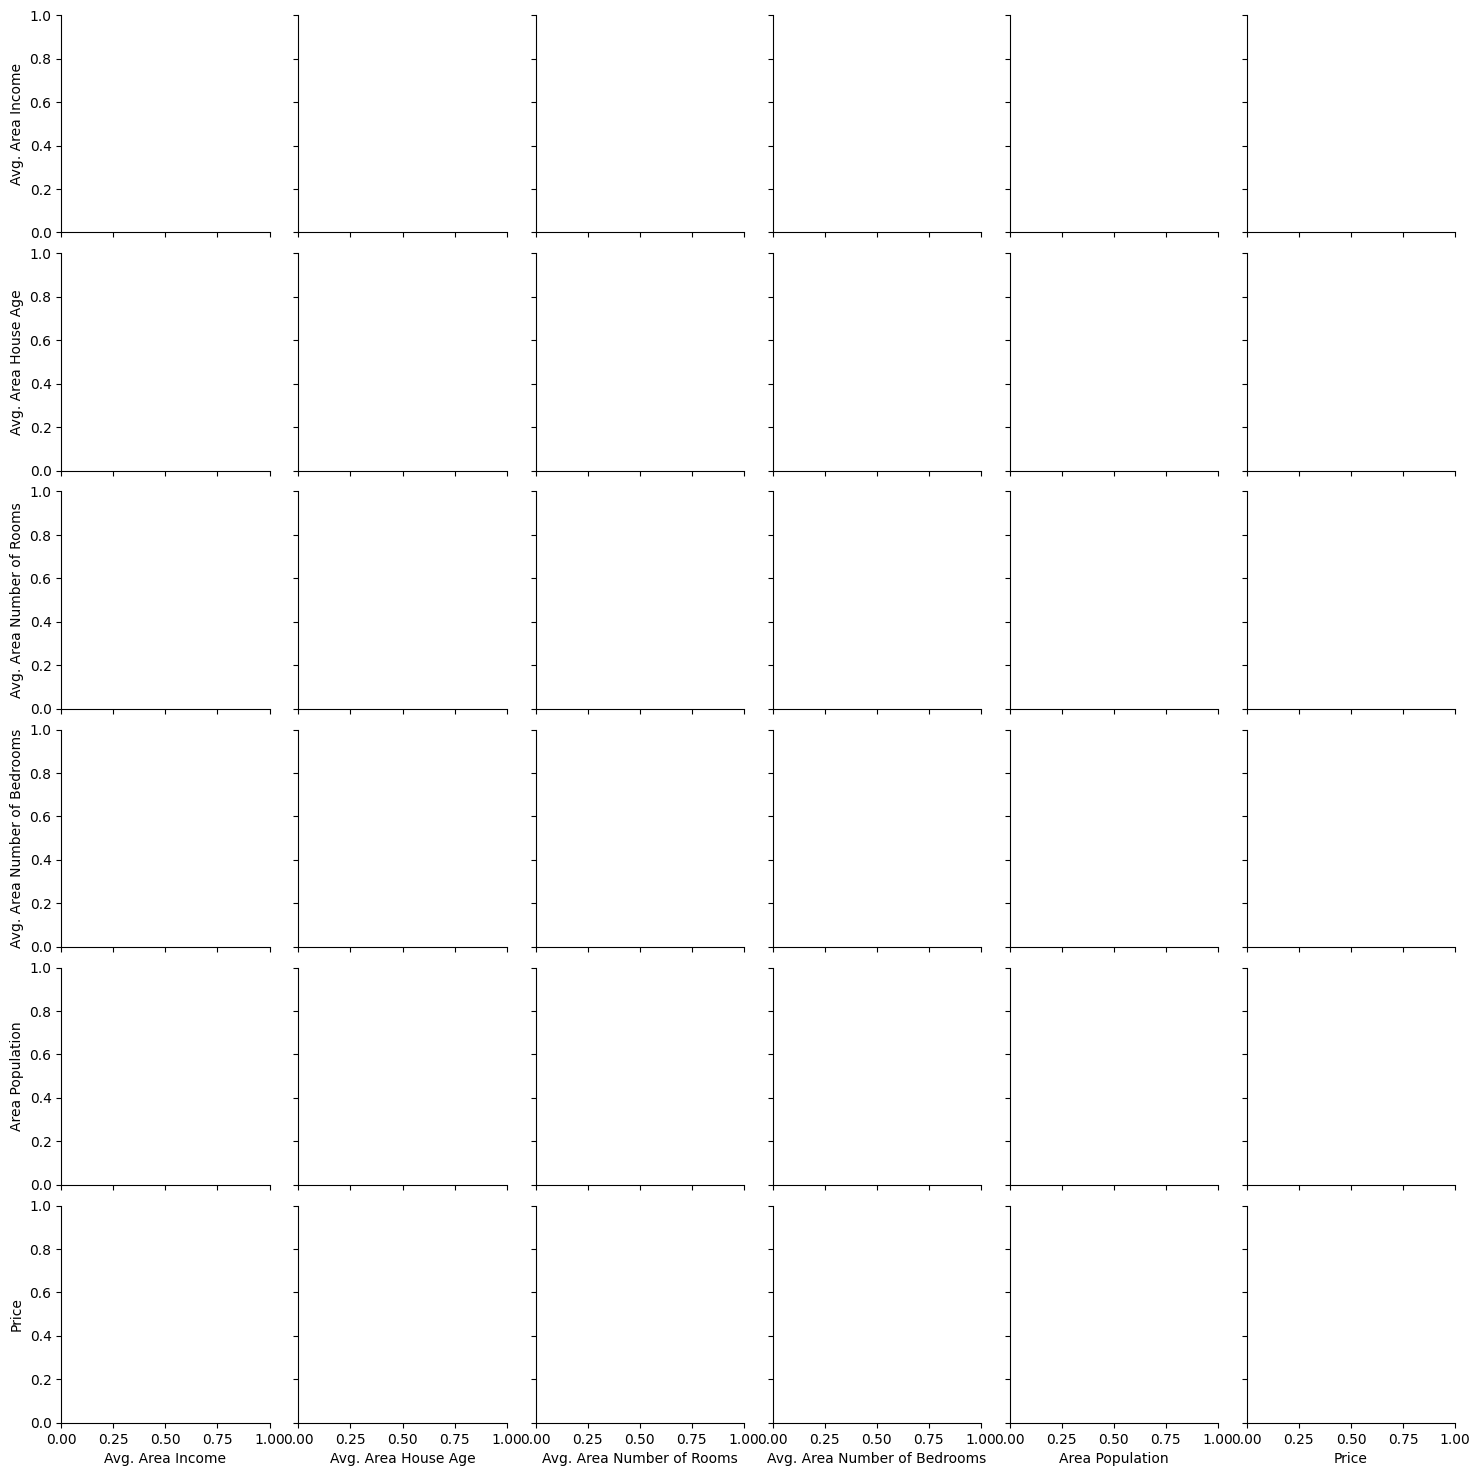

In [5]:
sns.pairplot(dataframe)

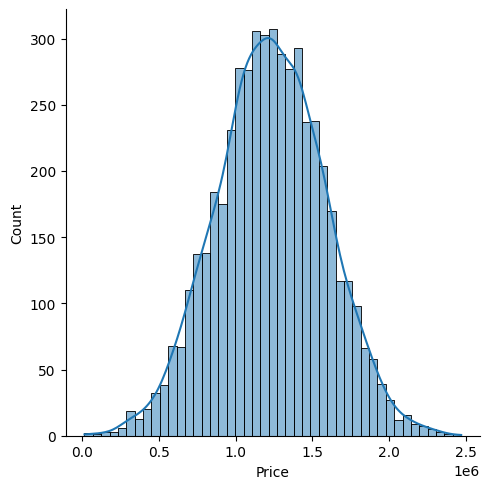

In [70]:
sns.displot(dataframe['Price'], kde=True)

##Treinando um modelo de regressão linear

Vamos agora começar a treinar o modelo de regressão! Precisaremos primeiro dividir nossos dados em um array X que contém os recursos para treinar e um array y com a variável de destino, neste caso a coluna Price. Iremos descartar a coluna Endereço porque ela tem apenas informações de texto que o modelo de regressão linear não pode usar.

###Arrays X e y

In [71]:
x = dataframe[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = dataframe['Price']

##Train Test Split

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de teste. Vamos treinar o modelo no conjunto de treinamento e, em seguida, usar o conjunto de teste para avaliar o modelo.

In [72]:
from sklearn.model_selection import train_test_split

##Criando e Treinando o modelo

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

##Avaliação do Modelo

Vamos avaliar o modelo verificando seus coeficientes e como podemos interpretá-los.

In [76]:
print(lm.intercept_)

-2640159.7968529635


In [77]:
coeff_df = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])
coeff_df.round()

,Coefficient
Avg. Area Income,22.0
Avg. Area House Age,164883.0
Avg. Area Number of Rooms,122369.0
Avg. Area Number of Bedrooms,2234.0
Area Population,15.0


Interpretando os coeficientes:

- Mantendo todos os outros parâmetros fixos, um aumento de 1 unidade na **Avg. Area Income** está associado a um **aumento de \$21.52**.
- Mantendo todos os outros parâmetros fixos, um aumento de 1 unidade na **Avg. Area House Age** está associado a um **aumento de \$164883.28**.
- Mantendo todos os outros parâmetros fixos, um aumento de 1 unidade na **Avg. Area Number of Rooms** está associado a um **aumento de \$122368.67**.
- Mantendo todos os outros parâmetros fixos, um aumento de 1 unidade na **Avg. Area Number of Bedrooms** está associado a um **aumento de \$2233.80**.
- Mantendo todos os outros parâmetros fixos, um aumento de 1 unidade na **Area Population** está associado a um **aumento de \$15.15**.

Isso faz sentido? Provavelmente não porque estes dados são inventados. Se você deseja que dados reais repitam esse tipo de análise, confira o [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):



    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

##Previsões do nosso modelo

Vamos pegar as previsões do nosso conjunto de testes e ver o quão bem ele se saiu!

In [78]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = boston.data

/home/lmello/11_Regressao_Linear/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califo

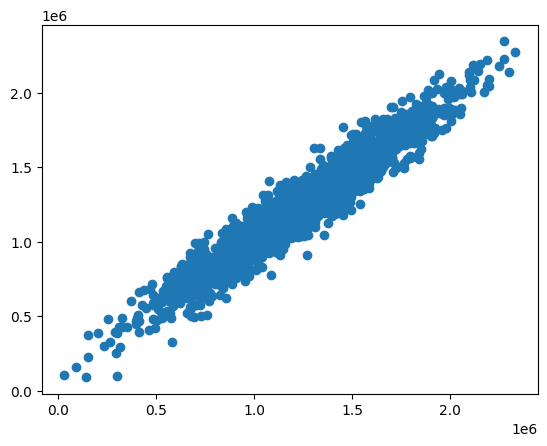

In [79]:
predictions = lm.predict(x_test)

plt.scatter(y_test, predictions)

**Histograma Residual**

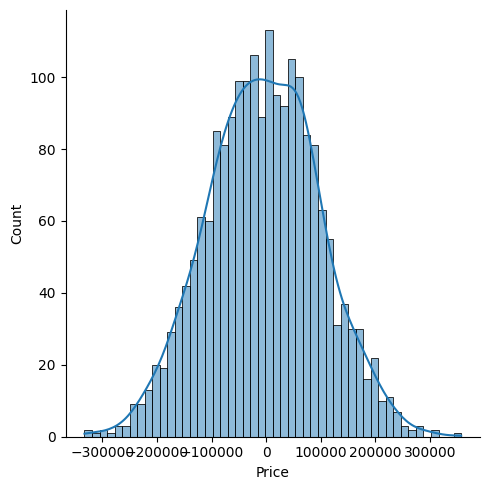

In [80]:
sns.displot((y_test-predictions), bins=50, kde=True)

##Métricas de Avaliação de Regressão


Aqui estão três métricas de avaliação comuns para problemas de regressão:

**Mean Absolute Error** (MAE) é a média do valor absoluto dos erros:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) é a média dos erros ao quadrado:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) é a raiz quadrada da média dos erros ao quadrado:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparando essas métricas:

- **MAE** é o mais fácil de entender, porque é o erro médio.
- **MSE** é mais popular que o MAE, porque o MSE "pune" erros maiores, o que tende a ser útil no mundo real.
- **RMSE** é ainda mais popular que o MSE, porque o RMSE é interpretável nas unidades de "y".

Todas essas são **funções de perda** (loss functions), porque queremos minimizá-las.

In [82]:
from sklearn import metrics


print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE:  82288.22251914945
MSE:  10460958907.208801
RMSE:  102278.82922290811


Parabéns por ajudar seu vizinho! Vá em frente e explore o Boston Dataset mencionado anteriormente se esse conjunto de dados específico for interessante para você!